# Thompson Sampling

We set up a lemonade stand on our street.

However, we do not know the best price to sell the lemonade to get the most sales. 

We do not have any historical data, we have never sold lemonade on our street before, we do not know the customer's expectations. 

Therefore, we must try a number of different prices to decide the best price. If we make it too cheap, our customers will think it is low quality, but if we make it too expensive, they will not buy it.

But we want to find the best price as quickly as possible as we can go home once we sell it all!

How do we best do this? 

### Step 0: Imports

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Step 1: set up the problem

We say that if a person buys a glass of lemonade, we assign that price with a reward of 1. If a person refuses to buy at that price, then we assign that price a reward of 0.

This is a Bernoulli experiment --> 1 or 0. 

**We want the price that maximises the probability of a sale**

Thompson sampling generates a reward distribution for each lemonade price. For binary rewards, the best function to do this is the [Beta Distribution](https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af). 




In [2]:
class BernoulliThompson:
    """
    Lemonade Price Class
    
    """
    def __init__( self, q):         
        """ constructor, initialise values """
        self.α = 1  # the number of times this price returned a sale        
        self.β = 1  # the number of times this price was not sold
        self.n = 0  # number of trials of this price
        self.q = q  # true reward value
        
    def prob_of_sale(self):        
        """ return some reward with the prices's predefined probability """
        return np.random.random() < self.q

                    
    def update(self,R):
        """ increase the number of times this price has been used and 
            update the counts of the number of times the price has and 
            has not returned a sale (alpha and beta)"""
        self.n += 1     # add 1 to the number of times this price has been shown
        self.α += int(R)     # update the number of times this price returned a sale
        self.β += (1-int(R)) # update the number of times this price was not sold
        
    def sample(self):
        """ return a value sampled from the beta distribution """
        return np.random.beta(self.α,self.β)

### Step 2: run the experiment

To simulate real life, we say that for lemonade prices of £1, £2, and £3, there is a probability of sale of 0.6, 0.8, and 0.3, respectively.

In [3]:
# the true probabilities that each prices returns a sale
buy_probabilities = [0.3,0.8,0.6]
prices = [1,2,3]
# Create a LemonadePrice object for each price (£1, £2, £3)
lemonade_prices = [BernoulliThompson(p) for p in buy_probabilities]

In [4]:
lemonade_prices[0].α, lemonade_prices[0].β

(1, 1)

#### Initially, we do not know anything about each price
Therefore we start with a flat probability distribution 

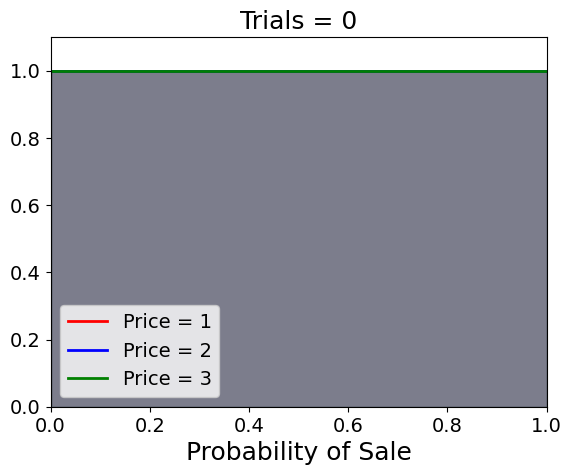

In [5]:
colours=['r', 'b', 'g']
x = np.linspace(0,1,100)
plt.title('Trials = 0', fontsize=18)

for index, lem in enumerate(lemonade_prices):

    # get the PDF of the prices using its estimates
    # this is the current estimated distribution 
    y = stats.beta.pdf(x, lem.α, lem.β)
    p = plt.plot(x, y, lw=2, label=f'Price = {prices[index]}',color=colours[index] )
    # c = p[0].get_markeredgecolor()  
    plt.fill_between(x, y, 0, color=colours[index], alpha=.3)    
    plt.legend(fontsize=14)
    plt.autoscale(tight=True)
    ymax = 1.1

# axes = plt.gca()
plt.xlabel('Probability of Sale', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,ymax])  
plt.show()

#### Choose the first price we show

Our first customer arrives and we need to decide on the price we want to show them.

We sample from each of our probability distributions and choose the price that returns the highest probability of sale. 


In [6]:
samples = [lemonade.sample() for lemonade in lemonade_prices]
print(samples)
best_price_index = np.argmax(samples)  

[0.37521828574876004, 0.01974617944932541, 0.8264490134773584]


We are equally likely to sample each price

In [7]:
print(f'We will offer this customer £{prices[best_price_index]}')

We will offer this customer £3


#### Simulate whether or not the customer buys or walks away

In [8]:
reward = lemonade_prices[best_price_index].prob_of_sale()
print(reward)

False


If True, the customer bought a lemonade, if False, they did not

#### Update our knowledge about that price

In [9]:
lemonade_prices[best_price_index].update(reward) 

#### Plot the expected distributions after 1 customer

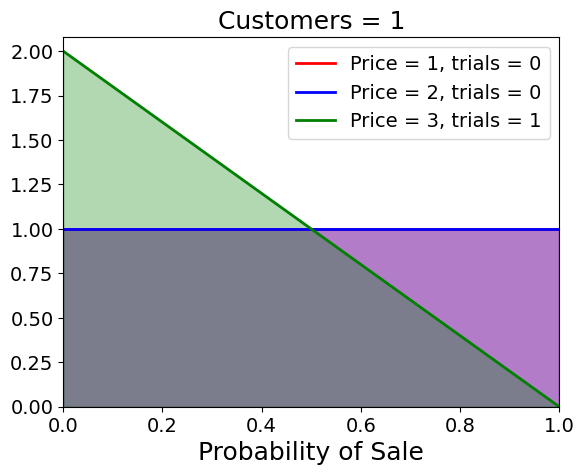

In [10]:
colours=['r', 'b', 'g']
x = np.linspace(0,1,100)
plt.title('Customers = 1', fontsize=18)

for index, lem in enumerate(lemonade_prices):

    # get the PDF of the prices using its estimates
    # this is the current estimated distribution 
    y = stats.beta.pdf(x, lem.α, lem.β)
    p = plt.plot(x, y, lw=2, label=f'Price = {prices[index]}, trials = {lem.n}',color=colours[index] )
    # c = p[0].get_markeredgecolor()  
    plt.fill_between(x, y, 0, color=colours[index], alpha=.3)    
    plt.legend(fontsize=14)
    plt.autoscale(tight=True)
    ymax = max( ymax, y[1:].max()*1.05 )

# axes = plt.gca()
plt.xlabel('Probability of Sale', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,ymax])  
plt.show()

We have updated the expected reward distribution based on our observation (first customer)

Now, we need to sample again to decide on the next price to show 

In [11]:
samples = [lemonade.sample() for lemonade in lemonade_prices]
print(samples)
best_price_index = np.argmax(samples)  

[0.9484001789119477, 0.7748274507277203, 0.7776597311191964]


In [12]:
print(f'We will offer this customer £{prices[best_price_index]}')

We will offer this customer £1


Does the next customer buy at this price? 

In [13]:
reward = lemonade_prices[best_price_index].prob_of_sale()
print(reward)

True


Update our knowledge

In [14]:
lemonade_prices[best_price_index].update(reward) 

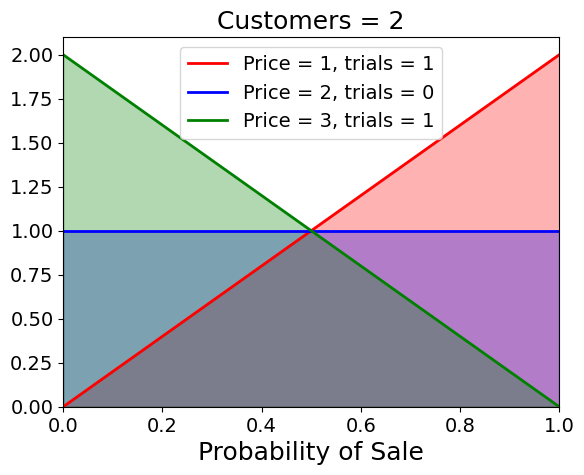

In [15]:
colours=['r', 'b', 'g']
x = np.linspace(0,1,100)
plt.title('Customers = 2', fontsize=18)

for index, lem in enumerate(lemonade_prices):

    # get the PDF of the prices using its estimates
    # this is the current estimated distribution 
    y = stats.beta.pdf(x, lem.α, lem.β)
    p = plt.plot(x, y, lw=2, label=f'Price = {prices[index]}, trials = {lem.n}',color=colours[index] )
    # c = p[0].get_markeredgecolor()  
    plt.fill_between(x, y, 0, color=colours[index], alpha=.3)    
    plt.legend(fontsize=14)
    plt.autoscale(tight=True)
    ymax = max( ymax, y[1:].max()*1.05 )

# axes = plt.gca()
plt.xlabel('Probability of Sale', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,ymax])  
plt.show()

### Automate These Steps for 100 customers

In [16]:
plt.figure(figsize=(14,14))
beta = stats.beta
x = np.linspace(0.0,1.0,200)

def plot_prices(prices, probabilities):
    
    trials = sum([price.n for price in prices])
    c_index = 0    
    
    for i in range(len(probabilities)):
        
        c = colours[c_index]
        y = beta( prices[i].α, prices[i].β )
        p = plt.plot(x, y.pdf(x), lw=2, color=c, label = f'{prices[i].α-1}/{prices[i].n}')
        plt.fill_between(x, y.pdf(x), 0, color=c, alpha=0.2 )
        plt.vlines(probabilities[i], 0, y.pdf(probabilities[i]), colors = c, linestyles = "--", lw = 2)
        plt.autoscale(tight = "True")
        plt.title(f"{trials} Trials")
        plt.legend()
        plt.autoscale(tight=True)
        c_index += 1

<Figure size 1400x1400 with 0 Axes>

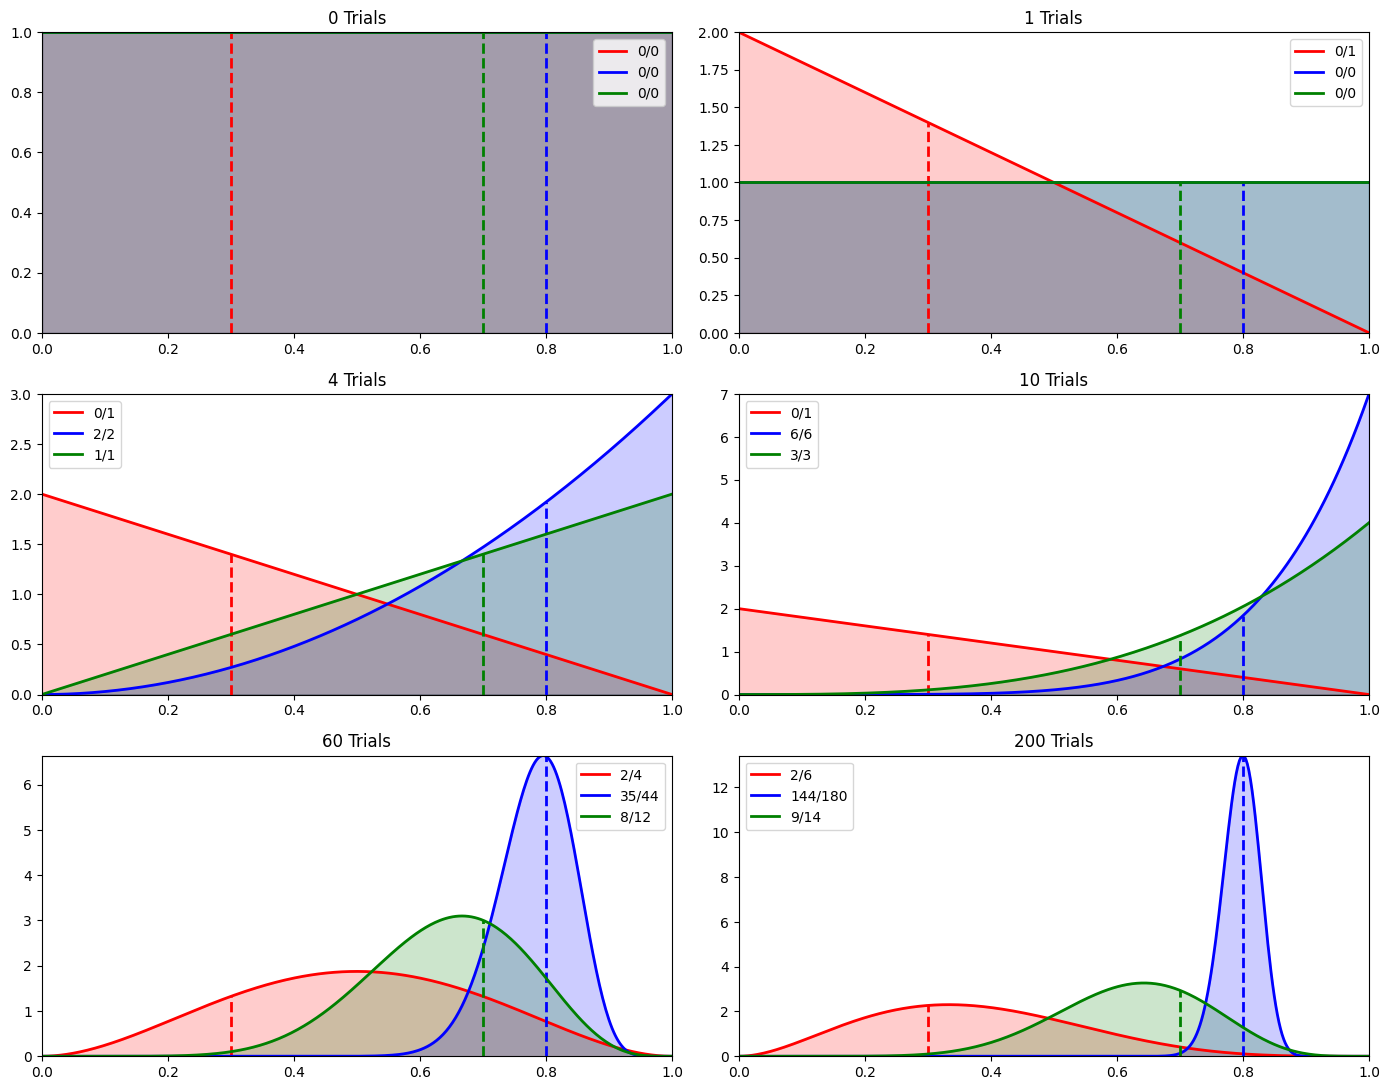

In [18]:
import random
seed = 100
random.seed(seed) 
np.random.seed(seed)

# the probabilities that each socket returns a charge
buy_probabilities = [0.3,0.8,0.7]

lemonade_prices = [BernoulliThompson(p) for p in buy_probabilities]


draw_samples = [0, 1, 3, 6, 50, 140]

x = np.linspace(0.0,1.0,400)
plt.figure(figsize=(14,18))

for j,i in enumerate(draw_samples):
    plt.subplot(5, 2, j+1)         
    plt.subplots_adjust(hspace = 0.3)
  
    for k in range(i): 
        # find the price to choose
        samples = [lemonade.sample() for lemonade in lemonade_prices]
        #print(samples)
        best_price_index = np.argmax(samples)  
        #print(best_price_index)
        # get reward from showing that price
        reward = lemonade_prices[best_price_index].prob_of_sale()
        #print(reward)
        # update knowledge for that price
        #print(lemonade_prices[best_price_index].α, lemonade_prices[best_price_index].β)
        lemonade_prices[best_price_index].update(reward)
        #print(lemonade_prices[best_price_index].α, lemonade_prices[best_price_index].β)
        

    plot_prices(lemonade_prices, buy_probabilities)
    
    plt.autoscale(tight = True)
plt.tight_layout()
    
# plt.savefig("Images/unknown_mean_unknown_variance.png",bbox_inches='tight') 